

```
# This is formatted as code
```

# PDA Designs

In [22]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.AnimatePDA import *
from jove.Def_PDA    import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

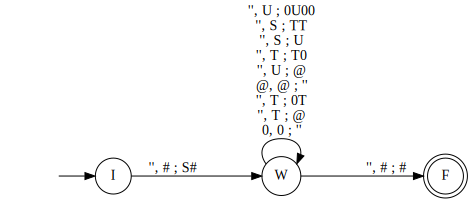

In [23]:
# Sipser example into a PDA
# S -> TT | U
# T -> 0T | T0 | @
# U -> 0U00 | @


pdas = md2mc('''PDA
I : '',# ; S# -> W

W : 0,0; '' -> W
W : @,@; '' -> W
W : '',S ; TT | '',S ; U | '',T;0T | '',T;T0| '',T; @ | '',U; 0U00 | '',U;@ ->W

W : '',# ; # -> F

''')
dotObj_pda(pdas, FuseEdges=True)



Bal Paren Example 1

In [24]:
explore_pda("0@00000@", pdas)

String 0@00000@ accepted by your PDA in 18 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '0@00000@', '#')
->  ('W', '0@00000@', 'S#')
->  ('W', '0@00000@', 'TT#')
->  ('W', '0@00000@', 'T0T#')
->  ('W', '0@00000@', 'T00T#')
->  ('W', '0@00000@', 'T000T#')
->  ('W', '0@00000@', '0T000T#')
->  ('W', '@00000@', 'T000T#')
->  ('W', '@00000@', 'T0000T#')
->  ('W', '@00000@', 'T00000T#')
->  ('W', '@00000@', '@00000T#')
->  ('W', '00000@', '00000T#')
->  ('W', '0000@', '0000T#')
->  ('W', '000@', '000T#')
->  ('W', '00@', '00T#')
->  ('W', '0@', '0T#')
->  ('W', '@', 'T#')
->  ('W', '@', '@#')
->  ('W', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '0@00000@', '#')
->  ('W', '0@00000@', 'S#')
->  ('W', '0@00000@', 'TT#')
->  ('W', '0@00000@', 'T0T#')
->  ('W', '0@00000@', 'T00T#')
->  ('W', '0@00000@', 'T000T#')
->  ('W', '0@00000@', '0T000T#')
->  ('W', '@00000@', 'T000T#')
->  ('W', '@00000@', 'T0000T#')
->

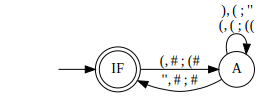

In [25]:
# Bal Paren 1

bp1 = md2mc('''PDA
IF : (, #; (# -> A
A  : (, (; (( -> A
A  : ), (; '' -> A
A  : '',#; #  -> IF
''')
dotObj_pda(bp1, FuseEdges=True)

In [26]:
explore_pda("()()()", bp1)

String ()()() accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '#')
Reached as follows:
->  ('IF', '()()()', '#')
->  ('A', ')()()', '(#')
->  ('A', '()()', '#')
->  ('IF', '()()', '#')
->  ('A', ')()', '(#')
->  ('A', '()', '#')
->  ('IF', '()', '#')
->  ('A', ')', '(#')
->  ('A', '', '#')
->  ('IF', '', '#') .


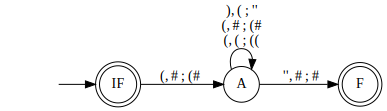

In [27]:
# Bal Paren 2

bp2 = md2mc('''PDA
IF : (, #; (# -> A
A  : (, (; (( -> A
A  : ), (; '' -> A
A  : (, #; (# -> A
A  : '',#; #  -> F
''')
dotObj_pda(bp2, FuseEdges=True)

In [28]:
explore_pda("()()()", bp2)

String ()()() accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', '()()()', '#')
->  ('A', ')()()', '(#')
->  ('A', '()()', '#')
->  ('A', ')()', '(#')
->  ('A', '()', '#')
->  ('A', ')', '(#')
->  ('A', '', '#')
->  ('F', '', '#') .


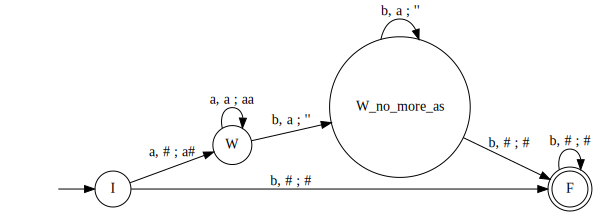

In [29]:
# a^i b^j  : i < j 
aibjlt = md2mc('''PDA

 
!! stack a's and match b's, need to have more b's, but crash on anything later

I :  b, # ; #  -> F

I :  a, # ; a# -> W

W :  a, a ; aa  -> W

W :  b, a ; ''  -> W_no_more_as
W_no_more_as : b, a; '' -> W_no_more_as
W_no_more_as :  b, # ; #  -> F

F : b , # ; # -> F

''')
dotObj_pda(aibjlt, FuseEdges=True)

In [30]:
explore_pda("aaabbbb", aibjlt)

String aaabbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aaabbbb', '#')
->  ('W', 'aabbbb', 'a#')
->  ('W', 'abbbb', 'aa#')
->  ('W', 'bbbb', 'aaa#')
->  ('W_no_more_as', 'bbb', 'aa#')
->  ('W_no_more_as', 'bb', 'a#')
->  ('W_no_more_as', 'b', '#')
->  ('F', '', '#') .


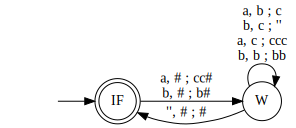

In [31]:
# Recognize the set of all strings comprised of a's and b's 
# where there are twice as many b's as a's

# a = $2
# b = $1
# c = half-an-a
# a in input --> push two c's on stack 

a1_b2_pda_broken = md2mc('''PDA
IF : a, # ; cc# | b, # ; b# -> W
W  : b, b ; bb | b, c; ''   -> W
W  : a, b ; c | a, c ; ccc -> W     !! c under b?
W  : '', # ; # -> IF
''')

# [ ] -a-> [ cc ] -b-> [ c ] -b-> [ ]

# [ ] -b-> [ b ] -b-> [ bb ] -a-> [ cb ] -b->  [ b ]

dotObj_pda(a1_b2_pda_broken, FuseEdges=True)




In [32]:
explore_pda("bba", a1_b2_pda_broken)

String bba rejected by your PDA :-(
Visited states are:
{('IF', 'bba', '#'), ('W', 'a', 'bb#'), ('W', '', 'cb#'), ('W', 'ba', 'b#')}


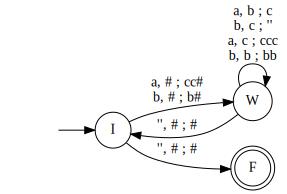

In [33]:
a1_b2_pda_alt_broken_too = md2mc('''

PDA

!! algo : each a is twice as heavy as b
!! but PDA fond of 1-1 matches; thus convert the a's to two c's
!! But we now have many interesting corner-cases we must deal with
!! coding those corner-cases will be the fun part of this lecture

I  : b, # ; b# -> W

I  : '', # ; #  -> F

I : a, # ; cc# -> W

W  : b, b ; bb -> W

W  : a, c ; ccc -> W

W  : b, c ; ''  -> W

W  : a, b ; c   -> W

W  : '', # ; #  -> I


''')

dotObj_pda(a1_b2_pda_alt_broken_too, FuseEdges=True)


In [34]:
#explore_pda("baabbababbbb", a1_b2_pda_alt_broken_too)
explore_pda("bba", a1_b2_pda_alt_broken_too)

String bba rejected by your PDA :-(
Visited states are:
{('W', 'a', 'bb#'), ('I', 'bba', '#'), ('W', 'ba', 'b#'), ('W', '', 'cb#'), ('F', 'bba', '#')}


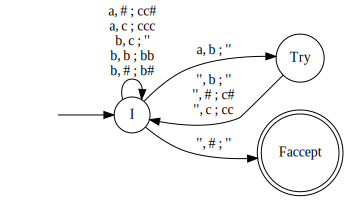

In [35]:
a1_b2_pda_correct = md2mc('''
PDA
!!---------------------------------------------------------------------------
!! This is a PDA that accepts all strings with twice as many b's as a's
!! That is, n_b = 2 * n_a must be satisfied
!! Recall this can happen when n_a = n_b = 0 (trivial case)
!!
!! Acceptance is required to be by final state
!! (see a1b2_accept_s.pda for a PDA that accepts by empty stack)
!!
!! PDA made by markdown will have # on top of stack (TOS)
!!
!! The basic algorithm is to convert a's to  two c's
!! Only c's and b's are allowed on the stack
!! But depending on the arrival order, we need to juggle what we put on TOS
!! For details, study the comments below
!!
!!---------------------------------------------------------------------------

I : '', # ; '' ->  Faccept !! In case the input string is empty,
                           !! we satisfy acceptance trivially; move into Faccept state

I : a, # ; cc#  -> I    !! An a coming in with # on TOS : turn a into two c

I : a, b ; ''  ->  Try  !! An a coming in with a b on TOS: we don't know what lies below b
                        !! So entry Try state, but after consuming that one b

Try : '', b ; ''  -> I  !! In Try state we find another b; how handy; consume that also
                        !! Now we are back in state I
			
Try : '', c ; cc  -> I  !! In Try state, we face a c; so we have consumed only one b
                        !! Express deficit of a 'b' by stacking a c
			
Try : '', # ; c# -> I   !! We face a #; we have again consumed only one b
                        !! Express deficit of a 'b' by stacking a c
			
I : a, c ; ccc  -> I    !! In I, we face 'c' on TOS, so express deficit of two b
       	   	   	!! by stacking two c

I : b, # ; b#   -> I	!! b input when # is TOS turns into b stacked
I : b, b ; bb   -> I    !! b input when b is TOS turns into b stacked
I : b, c ; ''   -> I    !! b and c are even match

!!---------------------------------------------------------------------------



 

''')
dotObj_pda(a1_b2_pda_correct, FuseEdges=True)

In [36]:
# [ #  ] -b-> [ b # ] -b-> [ bb# ] -a-> [ cb# ] -b->  [ b# ]
#
# I:[#] -b-> I: [ b# ] -b-> I: [ bb# ] -a-> Try: [ b# ] - '' -> I: [ # ] -> Faccept

explore_pda("bba", a1_b2_pda_correct)

String bba accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('Faccept', '', '')
Reached as follows:
->  ('I', 'bba', '#')
->  ('I', 'ba', 'b#')
->  ('I', 'a', 'bb#')
->  ('Try', '', 'b#')
->  ('I', '', '#')
->  ('Faccept', '', '') .


# END
